<a href="https://colab.research.google.com/github/arsh3103/DA-ML/blob/main/ARSHIYA_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEART DISEASE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#from google.colab import files
#uploaded=files.upload()

DATA COLLECTION AND PROCESSING

In [ ]:
hd=pd.read_csv('/content/heart_disease_data.csv')
hd.head(7)
#0 represents that the person does not have a HD and 1 represents the presence of HD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [ ]:
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
hd.shape

(303, 14)

In [ ]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Checking the distribution of Target column
hd['target'].value_counts() #we have 165 people with heart disease(represented by 1) and 138 people with no heart disease(represented by 0)

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

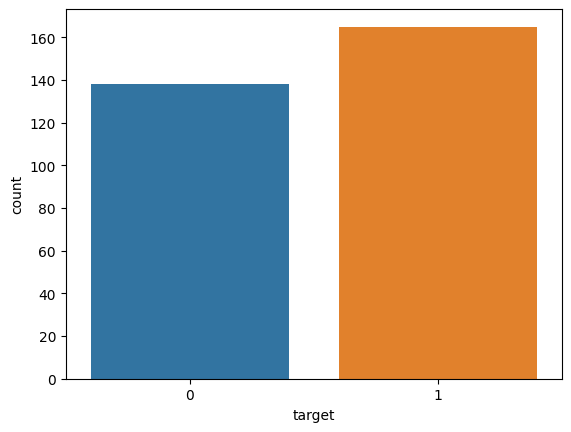

In [ ]:

sns.countplot(x='target',data=hd)

<Axes: xlabel='fbs', ylabel='count'>

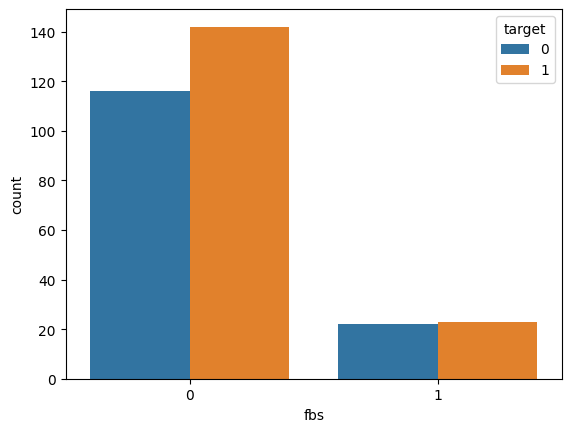

In [ ]:
sns.countplot(x='fbs', hue='target',data=hd)

In [ ]:
hd['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x7ea4c948bcd0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

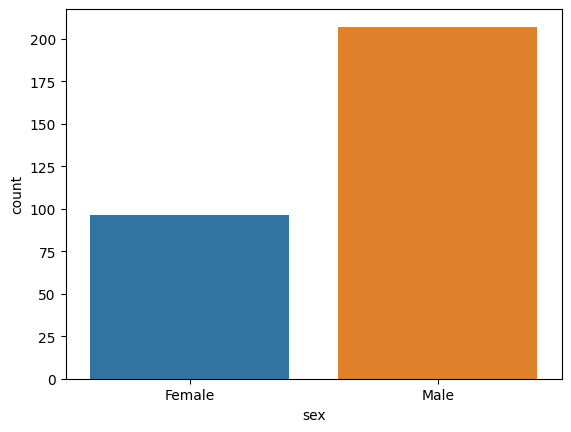

In [ ]:
sns.countplot(x='sex',data=hd)
plt.xticks([0,1],['Female','Male'])

In [ ]:
#Splitting the Features and Target(here,features includes all the columns to predict the target value.Hence,we now remove the Target column from our dataset and store it elsewhere)
X=hd.drop(columns='target',axis=1)#dropping the Target column from the dataset
Y=hd['target']#storing the Target column in y
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Splitting the data into Train and Test data.

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


MODEL TRAINING USING LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()
#training the LogisticRegression model with Training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION USING ACCURACY SCORE

In [ ]:
#accuracy on trained data
X_predict=model.predict(X_train)
train_accu=accuracy_score(X_predict,Y_train)
print('Accuracy on Training data : ' ,train_accu)

Accuracy on Training data :  0.8512396694214877


In [ ]:
#accuracy on test data
X_test_predict=model.predict(X_test)
test_accu=accuracy_score(X_test_predict,Y_test)
print('Accuracy on Test data : ' ,test_accu)

Accuracy on Test data :  0.819672131147541


BUILDING A PREDICTION SYSTEM(model predicting the target values when given the feature values)

In [ ]:
input=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input into a numpy array to reshape it.
input_np=np.array(input)
#reshaping is used to tell the model to make prediction for only one value instead of all the values
input_rs=input_np.reshape(1,-1)
prediction=model.predict(input_rs)
print(prediction)
if(prediction[0]==0):
   print('The person does not  have a heart disease.')
else:
    print('The person has a heart disease.')

[1]
The person has a heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
#change the input into a numpy array to reshape it.
input_np=np.array(input)
#reshaping is used to tell the model to make prediction for only one value instead of all the values
input_rs=input_np.reshape(1,-1)
prediction=model.predict(input_rs)
print(prediction)
if(prediction[0]==0):
   print('The person does not  have a heart disease.')
else:
    print('The person has a heart disease.')

[0]
The person does not  have a heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


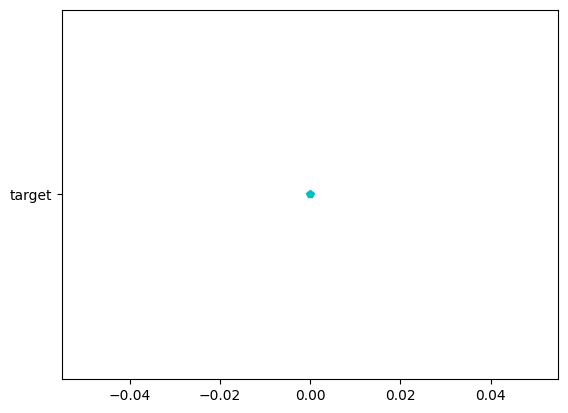

In [ ]:
plt.plot('target','')
plt.show()